In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("./lr.csv")

# Display the first few rows of the DataFrame
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Preprocess Data

# Handle missing values by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Encode categorical variables (if any)
# In this case, 'male' and 'currentSmoker' are categorical variables
df['male'] = df['male'].astype('category').cat.codes
df['currentSmoker'] = df['currentSmoker'].astype('category').cat.codes


# List of numerical features to be standardized
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the preprocessed DataFrame
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,-1.234283,0,-0.758062,0.0,0,-0.940825,-1.196267,-1.083027,0.287258,0.342775,-0.217427,0
1,0,-0.417664,0,-0.758062,0.0,0,0.300085,-0.515399,-0.159355,0.719668,1.590435,-0.261231,0
2,1,-0.184345,1,0.925410,0.0,0,0.187275,-0.220356,-0.243325,-0.113213,-0.073111,-0.524054,0
3,0,1.332233,1,1.767146,0.0,0,-0.263965,0.800946,1.016227,0.682815,-0.904884,0.921472,1
4,0,-0.417664,1,1.177931,0.0,0,1.089756,-0.106878,0.092555,-0.663554,0.758662,0.133004,0


In [4]:
# Split Dataset

# Define the feature columns and the target column
X = df.drop('Risk', axis=1)  # Features
y = df['Risk']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Testing set shape (y_test):", y_test.shape)

Training set shape (X_train): (3392, 12)
Training set shape (y_train): (3392,)
Testing set shape (X_test): (848, 12)
Testing set shape (y_test): (848,)


Training set Mean Squared Error: 0.10447262134075726
Testing set Mean Squared Error: 0.10488050504141413
Training set R^2 Score: 0.5147231487441293
Testing set R^2 Score: 0.49898700835486054


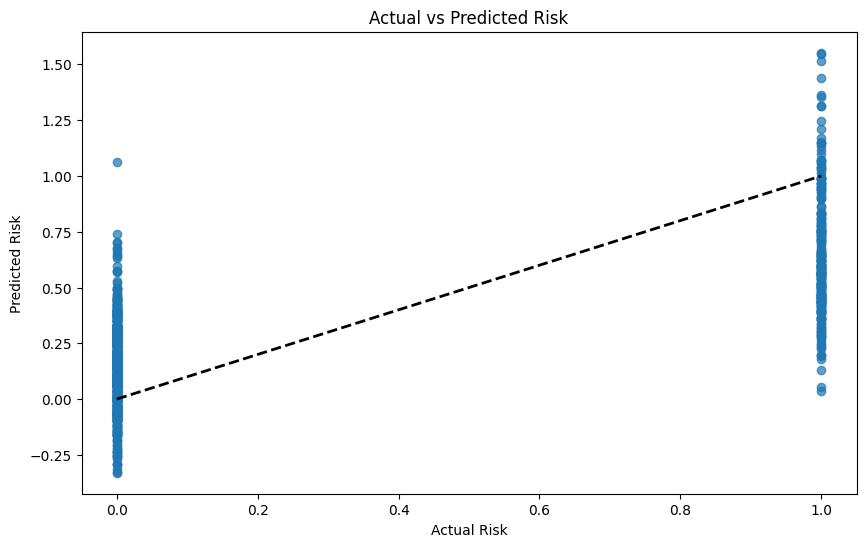

In [5]:
# Train Linear Regression Model

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training set Mean Squared Error:", train_mse)
print("Testing set Mean Squared Error:", test_mse)
print("Training set R^2 Score:", train_r2)
print("Testing set R^2 Score:", test_r2)

# Plot the predicted vs actual values for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel('Actual Risk')
plt.ylabel('Predicted Risk')
plt.title('Actual vs Predicted Risk')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Testing set Mean Squared Error (MSE): 0.10488050504141413
Testing set R-squared (R^2): 0.49898700835486054


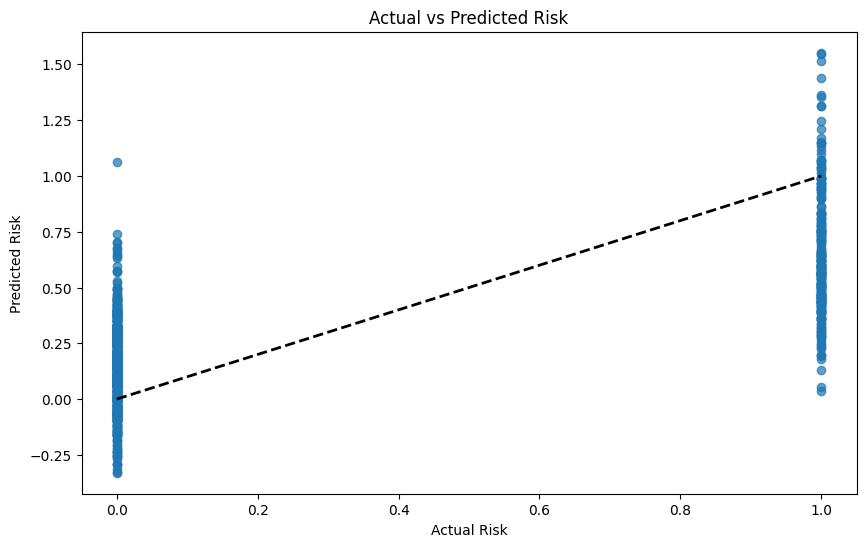

In [6]:
# Evaluate Model

# Evaluate the model's performance using Mean Squared Error (MSE) and R-squared on the testing dataset
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Testing set Mean Squared Error (MSE):", test_mse)
print("Testing set R-squared (R^2):", test_r2)

# Plot the predicted vs actual values for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel('Actual Risk')
plt.ylabel('Predicted Risk')
plt.title('Actual vs Predicted Risk')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [7]:
# Save the trained model to a file
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']